## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df["Classes"] = df["Classes"].str.strip()

In [6]:
df["Classes"].value_counts()

,count
Classes,
fire,137
not fire,106


In [11]:
df.drop(["day", "month", "year"],axis=1,inplace=True)

In [14]:
df["Classes"]= np.where(df["Classes"].str.contains("not fire"), 0, 1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [15]:
X = df.drop('Classes', axis=1)
y = df['Classes']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Text(0.5, 1.0, 'X_train After scaling')

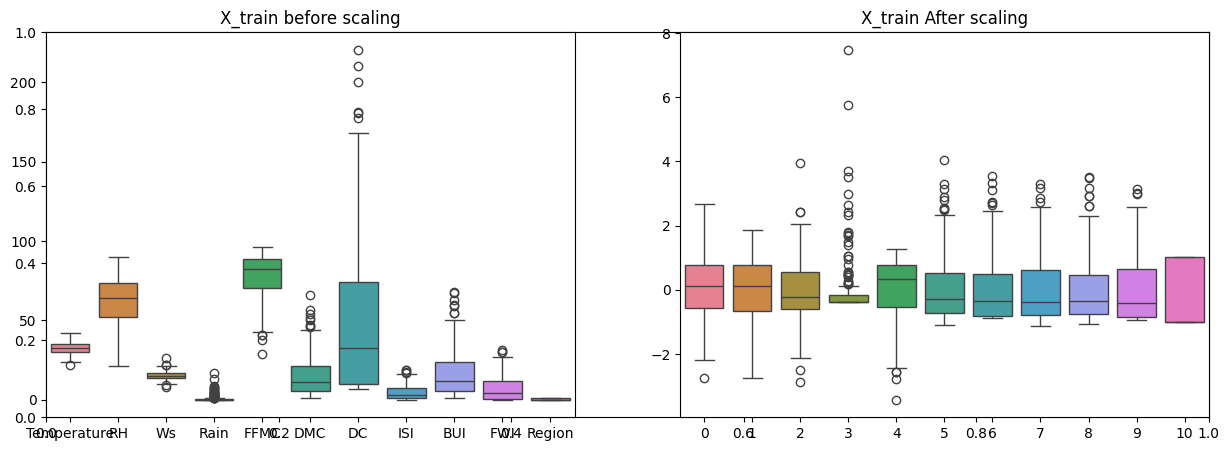

In [20]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train After scaling")

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

In [24]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.978021978021978, 0.9508196721311475)

In [25]:
confusion_matrix(y_test, y_pred_test)

array([[22,  2],
       [ 1, 36]])

In [27]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.95      0.97      0.96        37

    accuracy                           0.95        61
   macro avg       0.95      0.94      0.95        61
weighted avg       0.95      0.95      0.95        61



## Logistic regression Implementation on Random Data from make_classification

In [29]:
from sklearn.datasets import make_classification

Random Data generator for classification

In [42]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [43]:
X = pd.DataFrame(X)
y = pd.Series(y)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 10), (250, 10), (750,), (250,))

In [45]:
from sklearn.preprocessing import StandardScaler
sc_random_data = StandardScaler()
X_train_scaled = sc_random_data.fit_transform(X_train)
X_test_scaled = sc_random_data.transform(X_test)

Text(0.5, 1.0, 'X_train After scaling')

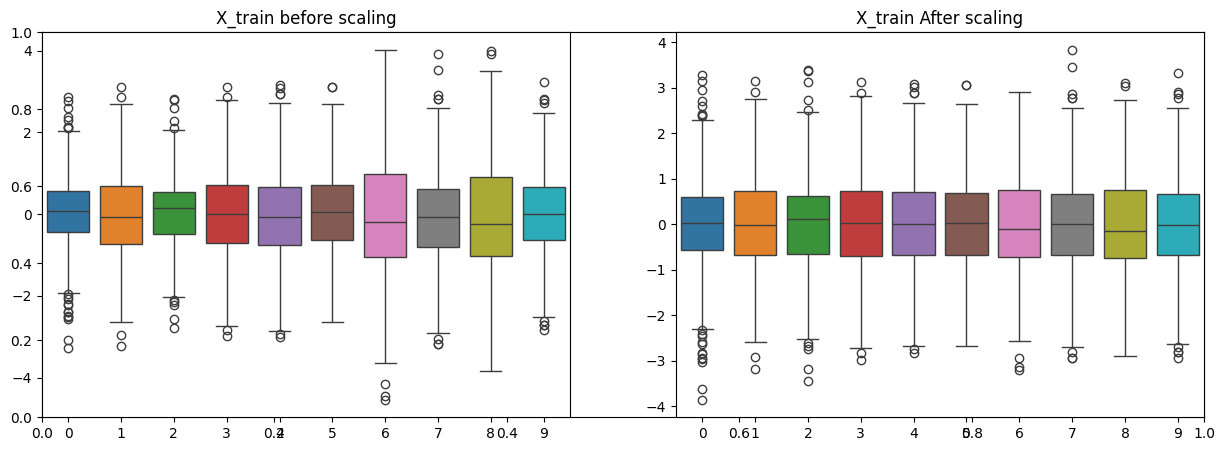

In [46]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train After scaling")

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

In [48]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.872, 0.84)

In [49]:
confusion_matrix(y_test, y_pred_test)

array([[ 98,  15],
       [ 25, 112]])